In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the results
results = pd.read_csv('../results/FP_DM_Oracle_sigmoids/agent_Nostro 1_stats.csv')

In [14]:
results['true_ctr'] = results['true_ctr'] * 100

In [17]:
# Dati dall'iterazione 1 in poi
results_1 = results[results['Iteration'] > 1]

<AxesSubplot:xlabel='Iteration'>

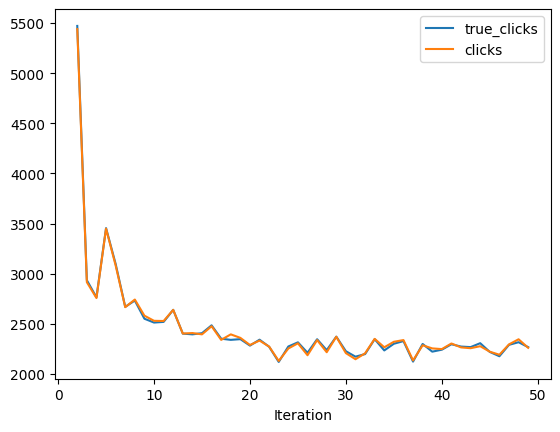

In [6]:
results[results['Iteration'] > 1].groupby('Iteration').agg({'true_clicks': 'sum', 'clicks': 'sum'}).plot()

<AxesSubplot:xlabel='Iteration'>

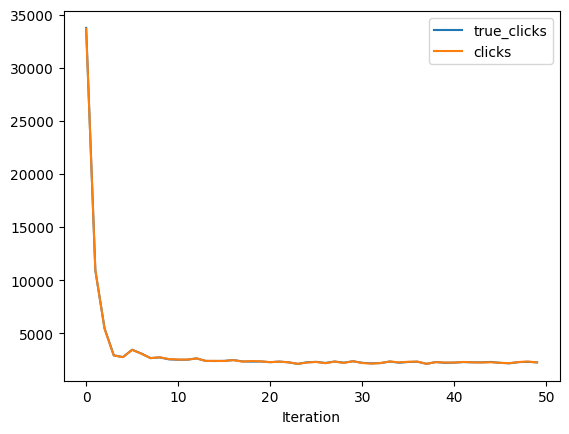

In [4]:
results.groupby('Iteration').agg({'true_clicks': 'sum', 'clicks': 'sum'}).plot()

<AxesSubplot:xlabel='Iteration'>

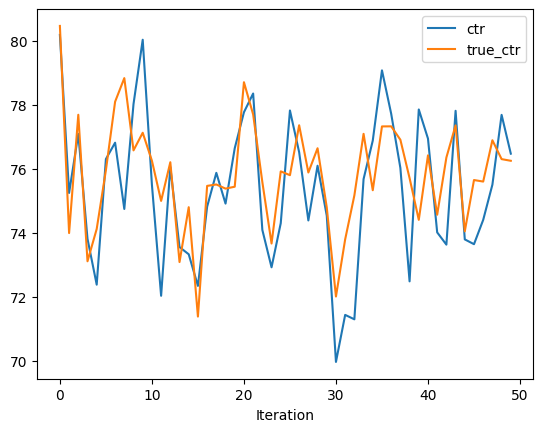

In [16]:
# Plot CTR
results.groupby('Iteration').agg({'ctr': 'mean', 'true_ctr': 'mean'}).plot()

In [20]:
grouped_data = results_1.groupby('Iteration').agg({'impressions': 'sum', 'clicks': 'sum', 'true_clicks': 'sum'})
grouped_data['ctr'] = grouped_data['clicks'] / grouped_data['impressions']
grouped_data['true_ctr'] = grouped_data['true_clicks'] / grouped_data['impressions']

<AxesSubplot:xlabel='Iteration'>

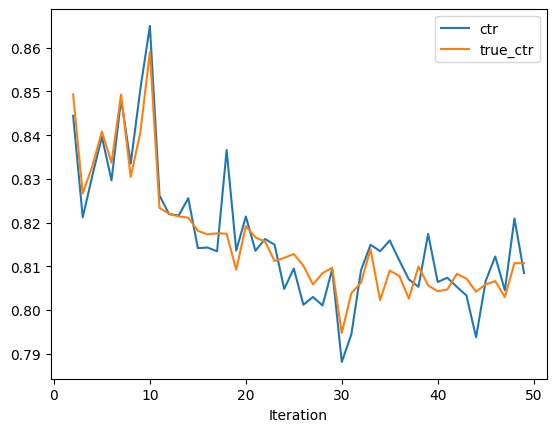

In [21]:
grouped_data[['ctr', 'true_ctr']].plot()

## Plot net utility

In [7]:
net_utility = pd.read_csv('../results/FP_DM_Oracle_sigmoids/net_utility_500_rounds_50_iters_1_runs_70_emb_of_70.csv')

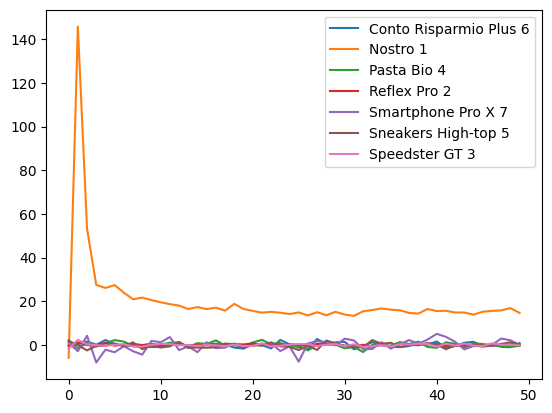

In [12]:
agents = net_utility['Agent'].unique()
for agent in agents:
    plt.plot(net_utility[net_utility['Agent'] == agent]['Iteration'].to_numpy(), net_utility[net_utility['Agent'] == agent]['Net Utility'].to_numpy(), label=agent)
plt.legend()
plt.show()